In [1]:
import IPython, graphviz, re
from io import StringIO
from IPython.display import Image
import numpy as np
import pandas as pd
import math
from sklearn import tree
from sklearn.datasets import load_boston, load_iris, load_wine, load_breast_cancer
from collections import defaultdict
import string
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# inspired by Mark Needham's blog
# https://markhneedham.com/blog/2017/09/23/python-3-create-sparklines-using-matplotlib/

#def sparkline(data, filename, fill=False, figsize=(4, 0.25), **kwags):
"""
Save a sparkline image
"""

boston = load_boston()

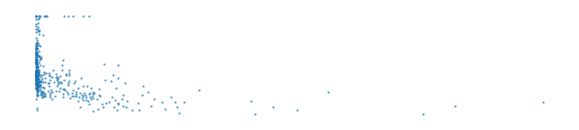

In [3]:
data = boston.data
feature_names = boston.feature_names
target = boston.target

fig, ax = plt.subplots(1, 1, figsize=(10,2))
ax.scatter(data[:,0], target, s=2, alpha=.5)
# ax.scatter(data[:,1], target, s=2)
# ax.scatter(data[:,2], target, s=2)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

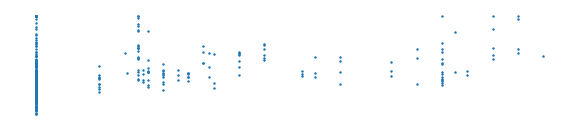

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10,2))
ax.scatter(data[:,1], target, s=2)
for k,v in ax.spines.items():
    v.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

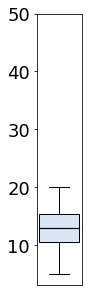

In [5]:
y = np.array([16.2, 18., 14.3, 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14., 14.4, 13.4, 15.6
, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 19.4, 17., 15.6, 13.1, 17.8, 16.8, 13.8, 13.8
, 13.9, 13.3, 13.1, 10.2, 10.9, 11.3, 12.3, 8.8, 7.2, 10.5, 7.4, 10.2, 11.5, 15.1
, 23.2, 9.7, 13.8, 12.7, 13.1, 12.5, 8.5, 5., 6.3, 5.6, 7.2, 12.1, 8.3, 8.5
, 5., 11.9, 7., 7.2, 7.5, 10.4, 8.8, 8.4, 16.7, 14.2, 13.4, 8.3, 10.9, 11.
, 9.5, 14.3, 11.7, 13.4, 9.6, 8.7, 8.4, 12.8, 10.5, 17.1, 18.4, 15.4, 10.8, 11.8
, 14.9, 12.6, 14.1, 13., 13.4, 15.2, 16.1, 14.9, 14.1, 12.7, 13.5, 14.9, 20., 16.4
, 17.7, 19., 16.7, 12., 14.6, 15.2, 7., 8.1, 13.6])

fig, ax = plt.subplots(1, 1, figsize=(.8,5))
ax.xaxis.set_visible(False)
ax.set_xticks([])
#ax.set_xlim(0,.2)

y_range = (3,50)
ax.set_ylim(y_range)
ax.tick_params(axis='both', which='major', labelsize=18)
meanprops = {'linewidth':1.2,'linestyle':'-','color':'black'}
bp =ax.boxplot(y, notch=False, medianprops={'linewidth':0}, meanprops=meanprops,
           widths=[.9], showmeans=True, meanline=True, sym='', patch_artist=True)
BLUE = "#D9E6F5"
YELLOW = "#fefecd"
for patch in bp['boxes']:
    patch.set(facecolor=BLUE)       
plt.show()

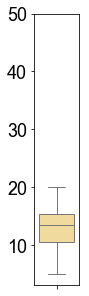

In [6]:
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(.8,5))
sns.set(style="white")
ax.set_ylim(3,50)
#ax.set_ylim('', fontsize=28, fontname="Arial)
#plt.xticks(fontsize=38)
plt.tick_params(axis='both', which='major', labelsize=18)
ax = sns.boxplot(y=y, color='#fee090', ax=ax, linewidth=1, sym='')

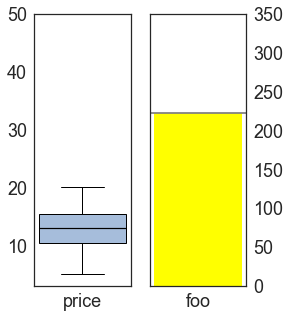

In [7]:
y = np.array([16.2, 18., 14.3, 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14., 14.4, 13.4, 15.6
, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 19.4, 17., 15.6, 13.1, 17.8, 16.8, 13.8, 13.8
, 13.9, 13.3, 13.1, 10.2, 10.9, 11.3, 12.3, 8.8, 7.2, 10.5, 7.4, 10.2, 11.5, 15.1
, 23.2, 9.7, 13.8, 12.7, 13.1, 12.5, 8.5, 5., 6.3, 5.6, 7.2, 12.1, 8.3, 8.5
, 5., 11.9, 7., 7.2, 7.5, 10.4, 8.8, 8.4, 16.7, 14.2, 13.4, 8.3, 10.9, 11.
, 9.5, 14.3, 11.7, 13.4, 9.6, 8.7, 8.4, 12.8, 10.5, 17.1, 18.4, 15.4, 10.8, 11.8
, 14.9, 12.6, 14.1, 13., 13.4, 15.2, 16.1, 14.9, 14.1, 12.7, 13.5, 14.9, 20., 16.4
, 17.7, 19., 16.7, 12., 14.6, 15.2, 7., 8.1, 13.6])

fig, axes = plt.subplots(1, 2, figsize=(3.8,5))
plt.subplots_adjust(wspace=.2)
ax0 = axes[0]
#ax0.xaxis.set_visible(False)
#ax0.set_xlabel("price", fontsize=18)
ax0.set_xticklabels(['ss','abc'])
#ax0.set_xticks([3], minor=True)

y_range = (3,50)
ax0.set_ylim(y_range)
ax0.tick_params(axis='both', which='major', labelsize=18)
meanprops = {'linewidth':1.2,'linestyle':'-','color':'black'}
bp =ax0.boxplot(y, notch=False,
                medianprops={'linewidth':0}, 
                meanprops=meanprops,
                widths=[.9],
                showmeans=True,
                meanline=True,
                sym='',
                labels=["price"],
                patch_artist=True)

BLUE = "#D9E6F5"
YELLOW = "#fefecd"
for patch in bp['boxes']:
    patch.set(facecolor='#a6bddb')       
    
ax1 = axes[1]
#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(['foo'])
# ax1.set_xticklabels(['ff'], minor=False)
#ax1.set_xlabel("n", fontsize=18)
ax1.yaxis.tick_right()
ax1.set_ylim(0,350)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.bar(0,223,color='yellow',tick_label='foo', linewidth=0)
ax1.axhline(223, color="grey")
plt.show()

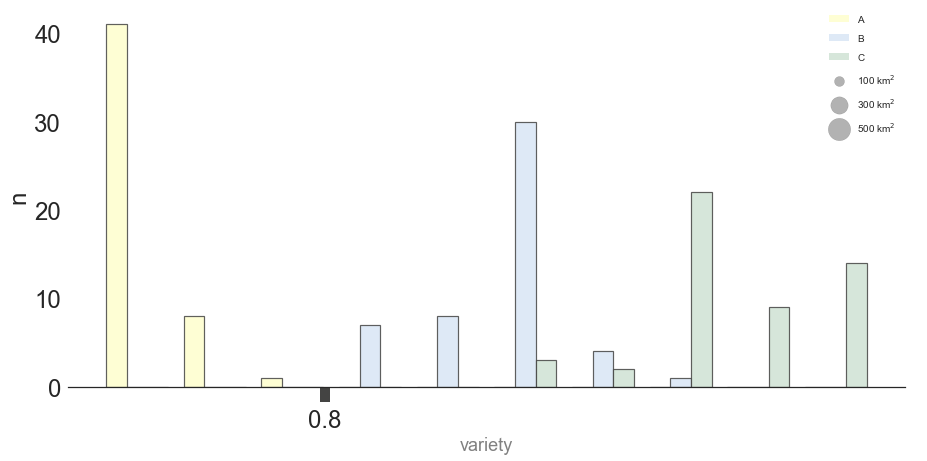

In [8]:
from dtreeviz.trees import *

precision = 1
GREY = '#444443'

iris = load_iris()
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names

clf = tree.DecisionTreeClassifier(max_depth=2, random_state=666)
clf = clf.fit(data, iris.target)

YELLOW = "#fefecd" # "#fbfbd0" # "#FBFEB0"
BLUE = "#D9E6F5"
GREEN = "#cfe2d4"
DARKBLUE = '#313695'
DARKGREEN = '#006400'
LIGHTORANGE = '#fee090'
LIGHTBLUE = '#a6bddb'
GREY = '#444443'
dark_colors = [DARKBLUE, DARKGREEN, '#a50026', '#fdae61', '#c51b7d', '#fee090']
mycolors = [YELLOW,BLUE,GREEN]

class_names=["setosa", "versicolor", "virginica"]
shadow_tree = ShadowDecTree(clf, data, iris.target,
                            feature_names=iris.feature_names, 
                            class_names=class_names)

node = shadow_tree.root
    
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.set_xlabel(f"variety", fontsize=18, fontname="Arial",
              color='grey')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

n_classes = 3
class_names = ['A','B','C']

X = iris.data
y = iris.target
X = X[:,node.feature()]
X, y = X[node.samples()], y[node.samples()]

X_hist = [X[y==cl] for cl in range(n_classes)]

binwidth = 30
hist,bins,barcontainers = ax.hist(X_hist,
              color=mycolors,
               #bins=np.arange(min(X), max(X) + binwidth , binwidth),
               label=class_names,
               linewidth=3,
              alpha=.85)
#ax.legend(prop={'size': 18})

for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, labelspacing=1)

for patch in barcontainers:
    for rect in patch.patches:
#         rect.linestyle='solid'
        rect.set_linewidth(1.2)
        rect.set_edgecolor(GREY)
    
#    print(patch)
#    patch.set(facecolor='#a6bddb')   
    
ax.set_xticks([round(node.split(),precision)])
ax.set_ylabel("n", fontsize=24)
ax.tick_params(axis='x', direction='out', length=15, width=10, color=GREY,
               labelsize=24)
ax.tick_params(axis='y', color=GREY, labelsize=24)
plt.show()

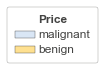

In [75]:
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
from matplotlib.transforms import Bbox
from matplotlib.figure import figaspect
import matplotlib.font_manager as font_manager

GREY = '#444443'

def draw_legend():
    box1 = patches.Rectangle((0, 0), 20, 10, linewidth=.4, edgecolor=GREY,
                             facecolor="#D9E6F5", label='malignant')
    #ax.add_patch(box1)
    box2 = patches.Rectangle((0, 0), 0, 0, linewidth=.4, edgecolor=GREY,
                             facecolor='#fee090', label='benign')


    # font = font_manager.FontProperties(family='Arial',
    #                                    style='normal',
    #                                    size=16)

    fs = figaspect(1/3)
    fs = (1,1)
    fig, ax = plt.subplots(1, 1, figsize=fs)
    leg = ax.legend(handles=[box1,box2],
                    frameon=True,
                    loc='center',
                    title='Price',
                    handletextpad=.35,
                    borderpad=.8,
                    #          bbox_to_anchor=(0.0, 0.0),
                    edgecolor=GREY,
                    )

    leg.get_title().set_color(GREY)
    leg.get_title().set_fontsize(12)
    leg.get_title().set_fontweight('bold')
    for text in leg.get_texts():
        text.set_color(GREY)
        text.set_fontsize(12)

    ax.set_xlim(0,20)
    ax.set_ylim(0,10)
    ax.axis('off')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    plt.tight_layout()

    plt.savefig("/tmp/legend.svg", bbox_inches='tight', pad_inches=0)

draw_legend()
plt.show()

In [10]:
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
from matplotlib.transforms import Bbox
from matplotlib.figure import figaspect

fs = (1,1)
fig, ax = plt.subplots(1, 1, figsize=(1,.6))
box1 = patches.Rectangle((0, 0), 2, 1, linewidth=1.2, edgecolor='grey',
                         facecolor='red', label='one')
ax.add_patch(box1)

ax.set_xlim(0,2)
ax.set_ylim(0,1)
ax.axis('off')
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.tight_layout()

plt.savefig("/tmp/legend.svg", bbox_inches='tight', pad_inches=0)

plt.show()

In [11]:
X_hist

[array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
        0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
        0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
        0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2]),
 array([1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. ,
        1.4, 1.3, 1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4,
        1.4, 1.7, 1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3,
        1.3, 1.2, 1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3]),
 array([2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1,
        2. , 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8,
        1.8, 1.8, 2.1, 1.6, 1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8,
        2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])]

[(0.1, 0.6), (1.0, 1.8), (1.4, 2.5)]
(0.1, 0.6)
50
(1.0, 1.8)
50
(1.4, 2.5)
50


NameError: name 'bbox' is not defined

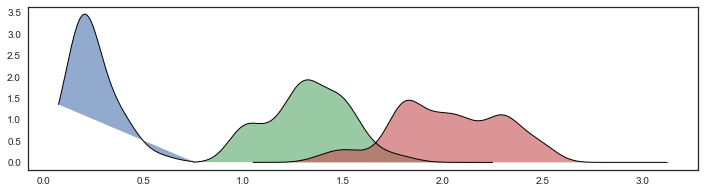

In [12]:
from scipy import stats
from sklearn.neighbors import KernelDensity

fig, ax = plt.subplots(1, 1, figsize=(12,3))
X = iris.data
y = iris.target
n_cols = X.shape[1]
X_hist = [X[y==cl] for cl in range(n_classes)]

i_splitvar = 3

ranges = [(np.min(X_hist[cl][:,i_splitvar]),np.max(X_hist[cl][:,i_splitvar])) for cl in range(n_classes)]
print(ranges)

for cl in range(n_classes):
    r=ranges[cl]
    print(r)
    X = X_hist[cl][:,i_splitvar]
    x_grid = np.linspace(r[0]-r[0]*.25, r[1]*1.25, 1000)
    if False:
        kernel = stats.gaussian_kde(X)
        heights = kernel.evaluate(x_grid)
    n = len(X)
    d = 1
    print(n)
    bw = n**(-1./(3))
    bw = (n * (d + 2) / 4.)**(-1. / (d + 4))
    bw /= 6
    kde = KernelDensity(kernel='gaussian', bandwidth=bw).fit(X.reshape(-1, 1))
    log_dens = kde.score_samples(x_grid.reshape(-1, 1))
    heights = np.exp(log_dens)
#     print(heights)
    plt.plot(x_grid, heights, linewidth=1, c='black')
    plt.fill(x_grid, heights, alpha=.6)
#    plt.ylim(0.0,3)


x = 2.5
xaxis_y = bbox.y0

#tria = np.array([[x,xaxis_y],[x-10,xaxis_y-10],[x+10,xaxis_y-10]])
tria = np.array([[x,0],[x-.2,-.3],[x+.2,-0.3]])
t = patches.Polygon(tria, linewidth=1.2, edgecolor='orange',
                      facecolor='orange', label='foo')
t.set_clip_on(False)
ax.set_xlabel(f'petal length')
#ax.add_patch(t)
#ax.set_xticks([])
#ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [ ]:
from scipy import stats
from sklearn.neighbors import KernelDensity

fig, ax = plt.subplots(1, 1, figsize=(12,3))
X = iris.data
y = iris.target
n_cols = X.shape[1]
X_hist = [X[y==cl] for cl in range(n_classes)]

i_splitvar = 3

ranges = [(np.min(X_hist[cl][:,i_splitvar]),np.max(X_hist[cl][:,i_splitvar])) for cl in range(n_classes)]


colors = ["#fefecd","#D9E6F5",'#a1dab4']

for cl in range(n_classes):
    X = X_hist[cl][:,i_splitvar]
    hist, bin_edges = np.histogram(X, density=False)
#     print(hist, bin_edges)
    print(X)
#     plt.scatter(X, [0]*len(X), s=50, alpha=.1, c=colors[cl], linewidth=.5, edgecolor='grey')
    plt.scatter(bin_edges, [0]*len(bin_edges), s=hist**2*20, alpha=.7, c=colors[cl], linewidth=1.2, edgecolor='grey')

x = 2.5
xaxis_y = bbox.y0
ax.set_ylim(-10,10)
#tria = np.array([[x,xaxis_y],[x-10,xaxis_y-10],[x+10,xaxis_y-10]])
tria = np.array([[x,0],[x-.2,-.3],[x+.2,-0.3]])
t = patches.Polygon(tria, linewidth=1.2, edgecolor='orange',
                      facecolor='orange', label='foo')
t.set_clip_on(False)
ax.set_xlabel(f'petal length')
#ax.add_patch(t)
#ax.set_xticks([])
#ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

In [ ]:
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch
from matplotlib.transforms import Bbox
from matplotlib.figure import figaspect

size = 1
fig, ax = plt.subplots(1, 1, figsize=(size,size), subplot_kw=dict(aspect="equal"))

ratios = [50, 4, 0, 19]
#ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
patches, _ = ax.pie(ratios, radius=1, shadow=False)
for patch in patches:
    print(patch)
    patch.set_linewidth(.5)
    patch.set_edgecolor('black')

plt.show()

In [ ]:
data = boston.data
feature_names = boston.feature_names
target = boston.target

fig, ax = plt.subplots(1, 1, figsize=(6,2))
mu = 0
sigma=.2
x = np.random.normal(mu, sigma, size=len(target))
ax.scatter(x, target, s=5, alpha=.7)
# ax.scatter(data[:,1], target, s=2)
# ax.scatter(data[:,2], target, s=2)

plt.show()

In [ ]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data

# Generate table

(1, 0)
Bbox(x0=9.0, y0=9.0, x1=36.9, y1=21.0)
(1, 1)
Bbox(x0=9.0, y0=9.0, x1=36.9, y1=21.0)
(2, 0)
Bbox(x0=9.0, y0=9.0, x1=36.9, y1=21.0)
(2, 1)
Bbox(x0=9.0, y0=9.0, x1=36.9, y1=21.0)
(0, 0)
Bbox(x0=9.0, y0=9.0, x1=36.9, y1=21.0)
(0, 1)
Bbox(x0=9.0, y0=9.0, x1=36.9, y1=21.0)


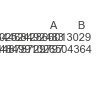

In [186]:
import matplotlib.font_manager as font_manager

fs = (4,1)
nrows = 2
ncols = 2
hcell, wcell = 0.3, 1.
hpad, wpad = 0, 0    
fs=(ncols*wcell+wpad, nrows*hcell+hpad)
fig, ax = plt.subplots(1,1, figsize=(1,1))

# hide axes
# fig.patch.set_visible(False)
ax.axis('off')
# ax.axis('tight')
ax.set_xlim(0,0.01)
ax.set_ylim(0,0.01)

# ax.xaxis.set_visible(False)
# ax.yaxis.set_visible(False)

df = pd.DataFrame(np.random.randn(2, 2), columns=list('AB'))


tab = ax.table(cellText=df.values,
             colLabels=df.columns,
#             colColours=['red','blue'],
             loc='center',
               clip_on = True,
#               bbox = [0, 0, 0.7, 0.2]
              )

tab.auto_set_font_size(False)
#print('\n'.join(dir(tab)))
for key, cell in tab.get_celld().items():
    row, col = key
    print(key)
    cell.set_fontsize(11)
    cell.set_text_props(fontname='Arial', color=GREY)
    cell.set_linewidth(0)
    print(cell.get_extents())

#fig.tight_layout()
plt.savefig("/tmp/table.svg", bbox_inches='tight', pad_inches=0)

plt.show()

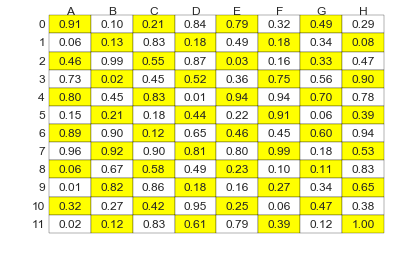

In [209]:
import matplotlib.pyplot as plt
import numpy as np
import pandas

from matplotlib.table import Table

def checkerboard_table(data, fmt='{:.2f}', bkg_colors=['yellow', 'white']):
    fig, ax = plt.subplots()
    ax.set_axis_off()
    tb = Table(ax)

    nrows, ncols = data.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i,j), val in np.ndenumerate(data):
        # Index either the first or second item of bkg_colors based on
        # a checker board pattern
        idx = [j % 2, (j + 1) % 2][i % 2]
        color = bkg_colors[idx]

        tb.add_cell(i, j, width, height, text=fmt.format(val), 
                    loc='center', facecolor=color)

    # Row Labels...
    for i, label in enumerate(data.index):
        tb.add_cell(i, -1, width, height, text=label, loc='right', 
                    edgecolor='none', facecolor='none')
    # Column Labels...
    for j, label in enumerate(data.columns):
        tb.add_cell(-1, j, width, height/2, text=label, loc='center', 
                           edgecolor='none', facecolor='none')
    ax.add_table(tb)
    return fig

data = pandas.DataFrame(np.random.random((12,8)), 
                        columns=['A','B','C','D','E','F','G','H'])
checkerboard_table(data)
plt.show()


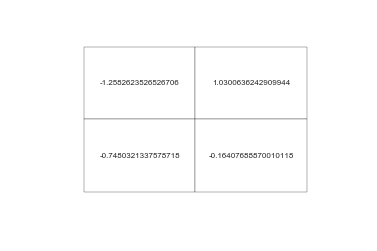

In [221]:
fig, ax = plt.subplots()
ax.set_axis_off()

df = pd.DataFrame(np.random.randn(2, 2), columns=list('AB'))

nrows, ncols = df.shape
width, height = 1.0 / (ncols+1), 1.0 / (nrows+1)

tb = Table(ax)
for i in range(nrows):
    for j in range(ncols):
        tb.add_cell(i, j, width, height, text=df.iloc[i,j], 
                            loc='center')
ax.add_table(tb)
plt.show()

# fonts

In [207]:
from matplotlib import rcParams
from matplotlib.afm import AFM
import os.path
from pathlib import Path

print(rcParams['datapath'])

fontnames = ['cmex10.afm', 'cmmi10.afm', 'cmr10.afm', 'cmsy10.afm', 
             'cmtt10.afm', 'pagd8a.afm', 'pagdo8a.afm', 'pagk8a.afm', 
             'pagko8a.afm', 'pbkd8a.afm', 'pbkdi8a.afm', 'pbkl8a.afm', 
             'pbkli8a.afm', 'pcrb8a.afm', 'pcrbo8a.afm', 'pcrr8a.afm',
             'pcrro8a.afm', 'phvb8a.afm', 'phvb8an.afm', 'phvbo8a.afm', 
             'phvbo8an.afm', 'phvl8a.afm', 'phvlo8a.afm', 'phvr8a.afm', 
             'phvr8an.afm', 'phvro8a.afm', 'phvro8an.afm', 'pncb8a.afm',
             'pncbi8a.afm', 'pncr8a.afm', 'pncri8a.afm', 'pplb8a.afm',
             'pplbi8a.afm', 'pplr8a.afm', 'pplri8a.afm', 'psyr.afm',
             'ptmb8a.afm', 'ptmbi8a.afm', 'ptmr8a.afm', 'ptmri8a.afm',
             'putb8a.afm', 'putbi8a.afm', 'putr8a.afm', 'putri8a.afm',
             'pzcmi8a.afm', 'pzdr.afm']
fontname2filename = {}
for font in fontnames:
    p = Path(afm_fname)
    afm_fname = os.path.join(rcParams['datapath'],
                        'fonts', 'afm', font)
    with open(afm_fname, 'rb') as fh:
        afm = AFM(fh)
#     print(p.name, afm.get_fontname())
    fontname2filename[afm.get_fontname()] = p.name
    #afm.string_width_height('What the heck?')
    
#print(fontname2filename)
def get_font_metrics(fontname): # phvr8a.afm
    FONT_FILENAMES = {'CMEX10': 'pzdr.afm',
                'CMMI10': 'cmex10.afm',
                'CMR10': 'cmmi10.afm',
                'CMSY10': 'cmr10.afm',
                'CMTT10': 'cmsy10.afm',
                'AvantGarde-Demi': 'cmtt10.afm',
                'AvantGarde-DemiOblique': 'pagd8a.afm',
                'AvantGarde-Book': 'pagdo8a.afm',
                'AvantGarde-BookOblique': 'pagk8a.afm',
                'Bookman-Demi': 'pagko8a.afm',
                'Bookman-DemiItalic': 'pbkd8a.afm',
                'Bookman-Light': 'pbkdi8a.afm',
                'Bookman-LightItalic': 'pbkl8a.afm',
                'Courier-Bold': 'pbkli8a.afm',
                'Courier-BoldOblique': 'pcrb8a.afm',
                'Courier': 'pcrbo8a.afm',
                'Courier-Oblique': 'pcrr8a.afm',
                'Helvetica-Bold': 'pcrro8a.afm',
                'Helvetica-Narrow-Bold': 'phvb8a.afm',
                'Helvetica-BoldOblique': 'phvb8an.afm',
                'Helvetica-Narrow-BoldOblique': 'phvbo8a.afm',
                'Helvetica-Light': 'phvbo8an.afm',
                'Helvetica-LightOblique': 'phvl8a.afm',
                'Helvetica': 'phvlo8a.afm',
                'Helvetica-Narrow': 'phvr8a.afm',
                'Helvetica-Oblique': 'phvr8an.afm',
                'Helvetica-Narrow-Oblique': 'phvro8a.afm',
                'NewCenturySchlbk-Bold': 'phvro8an.afm',
                'NewCenturySchlbk-BoldItalic': 'pncb8a.afm',
                'NewCenturySchlbk-Roman': 'pncbi8a.afm',
                'NewCenturySchlbk-Italic': 'pncr8a.afm',
                'Palatino-Bold': 'pncri8a.afm',
                'Palatino-BoldItalic': 'pplb8a.afm',
                'Palatino-Roman': 'pplbi8a.afm',
                'Palatino-Italic': 'pplr8a.afm',
                'Symbol': 'pplri8a.afm',
                'Times-Bold': 'psyr.afm',
                'Times-BoldItalic': 'ptmb8a.afm',
                'Times-Roman': 'ptmbi8a.afm',
                'Times-Italic': 'ptmr8a.afm',
                'Utopia-Bold': 'ptmri8a.afm',
                'Utopia-BoldItalic': 'putb8a.afm',
                'Utopia-Regular': 'putbi8a.afm',
                'Utopia-Italic': 'putr8a.afm',
                'ZapfChancery-MediumItalic': 'putri8a.afm',
                'ZapfDingbats': 'pzcmi8a.afm'}
    afm_fname = os.path.join(rcParams['datapath'],
                        'fonts', 'afm', FONT_FILENAMES[fontname])
    with open(afm_fname, 'rb') as fh:
        afm = AFM(fh)
    return afm

print(get_font_metrics('Helvetica').get_fontname())

/Users/parrt/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data
Helvetica-LightOblique


In [189]:
import matplotlib as mpl
fm = mpl.font_manager
fm.get_cachedir()

'/Users/parrt/.matplotlib'